In [423]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [424]:
dfname = pd.read_table('geneNames.txt', header=None, names=["gen_names"])

In [425]:
df = pd.read_table("gene_expression.csv", sep=";", header=None)
dfvysl = pd.read_csv('label.csv', header=None, names=["cancer"])

In [426]:
df.columns =  dfname['gen_names']

In [427]:
df.head()

gen_names,x,x,x,x,x,x,x,x,x,x,...,STAT5B,MFGE8,CAMK2D,TUBA4A,CYP4B1,PTGER3,x,RB1,GYPA,x
0,"-72,8898534","27,78356481","-43,8599537","-123,0592207","-10,68422068","-96,79320988","224,4076003","32,27951389","123,0636574","73,20061728",...,"-30,19907407","-238,8402778","-102,7033179","-69,96489198","1,776813272","-90,51678241","-29,36959876","16,67631173","-296,9403935","-1,324652778"
1,"-30,34818673","78,63078704","-2,179398148","71,12133488","-18,75366512","-2,62654321","-272,3979552","9,696180555","19,11921296","-18,67438272",...,"-17,14351852","87,1875","-39,09220679","25,8128858","9,401813272","-75,57233796","-19,9529321","-3,157021605","-374,4403935","9,897569444"
2,"64,59625772","129,7974537","-196,4016204","33,14911265","5,524112655","-48,30709877","90,07426698","-55,81770833","67,0775463","-232,5216049",...,"52,16203704","253,6041667","30,96334877","-271,1593364","72,2351466","86,12210648","280,9220679","20,98186728","-285,3431713","3,842013889"
3,"10,49903549","76,76967593","238,7094907","-174,2397762","-79,98977623","-39,90432099","209,3937114","-16,05381944","-29,90856481","-56,85493827",...,"34,99537037","121,7986111","198,2272377","-236,339892","-47,23707562","-206,7251157","-143,6334877","-44,43479938","-335,134838","-35,49131944"
4,"-88,1398534","-69,46643519","-145,4293981","-40,55922068","-144,7258873","-78,91820988","39,47704475","-38,20659722","-25,63078704","146,117284",...,"-39,85185185","-60,78472222","46,71334877","93,45177469","-38,36207562","-545,7112269","1,56095679","-21,1570216","-410,0237269","-39,38020833"


In [428]:
X = df
y = dfvysl

In [429]:
X = X.replace(',','.', regex=True)
y = y.replace(',','.', regex=True)

In [430]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Accuracy train: 1.0
Accuracy test: 0.9444444444444444


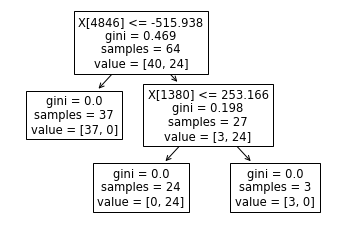

In [431]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
tree.plot_tree(clf)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print("Accuracy train:",metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred))

In [432]:
X_pca = df
y_pca = dfvysl
X_pca = X_pca.replace(',','.', regex=True)
y_pca = y_pca.replace(',','.', regex=True)

In [433]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=0.2, random_state=0)

In [434]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [435]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [436]:
explained_variance = pca.explained_variance_ratio_

In [437]:
explained_variance 

array([9.89911064e-02, 5.11269072e-02, 4.67840900e-02, 4.34271593e-02,
       4.02431168e-02, 3.80297195e-02, 3.09091615e-02, 2.88780560e-02,
       2.64020747e-02, 2.49490264e-02, 2.40079891e-02, 2.17000230e-02,
       2.09625377e-02, 2.05724707e-02, 1.93842507e-02, 1.91167404e-02,
       1.78408940e-02, 1.75270018e-02, 1.66772363e-02, 1.61258216e-02,
       1.59102437e-02, 1.54362140e-02, 1.51949246e-02, 1.44048725e-02,
       1.39940099e-02, 1.38705889e-02, 1.32483492e-02, 1.29341022e-02,
       1.27653201e-02, 1.23832094e-02, 1.17955207e-02, 1.15267695e-02,
       1.13773101e-02, 1.11183017e-02, 1.09975755e-02, 1.05682052e-02,
       1.03027618e-02, 1.00405160e-02, 9.84748390e-03, 9.82471478e-03,
       9.49702939e-03, 9.26981673e-03, 9.05428490e-03, 8.98080435e-03,
       8.71902499e-03, 8.60104556e-03, 8.37656098e-03, 8.19631109e-03,
       8.10382495e-03, 7.80038023e-03, 7.70622760e-03, 7.61465693e-03,
       7.34533162e-03, 7.05082437e-03, 6.59249698e-03, 5.89500272e-03,
      

In [450]:
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [451]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train.values.ravel())
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [459]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3333333333333333
